# **Projeto Final Python - Análise de crédito**




# ***Introdução***
O crédito é uma ferramenta vital na economia moderna, permitindo o acesso a bens e serviços que, de outra forma, seriam inacessíveis imediatamente. Sua importância é inegável, pois impulsiona o crescimento econômico, viabiliza investimentos e facilita a realização de metas pessoais e empresariais. No entanto, seu uso inadequado ou a inadimplência podem acarretar sérios problemas financeiros.

Contudo, a falta de controle no uso do crédito pode resultar em inadimplência, levando a um ciclo prejudicial. A inadimplência ocorre quando há atraso ou falta de pagamento das dívidas contraídas. Isso gera uma série de consequências negativas, como o aumento de juros, restrição de acesso a novos empréstimos, impacto na pontuação de crédito e, em casos extremos, execuções judiciais ou perda de bens.

Portanto, é crucial manter um equilíbrio saudável no uso do crédito. Isso inclui um planejamento cuidadoso, avaliação realista da capacidade de pagamento, controle de gastos e priorização de dívidas para evitar o acúmulo de compromissos financeiros não gerenciáveis. O crédito é uma ferramenta valiosa, desde que seja usado com responsabilidade e consciência financeira.


# **Objetivos**
Por meio da análise de dados, o objetivo deste projeto é garantir que a empresa fictícia, detentora dos dados, atenda melhor seus clientes, minimizando as perdas e oferecendo melhores produtos e serviços. O estudo visa identificar possíveis relações, causas, semelhanças e comportamentos *de* grupos que possuem potencial de se tornarem inadimplentes.

# **Exploração de dados**
Vamos explorar dados de crédito presentes neste neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de default, que indica se um cliente é adimplente(default = 0), ou inadimplente (default = 1), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |




###**Importação de bibliotecas**

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###**Leitura dos dados iniciais**

Importação da base de dados contidas no link e salvando como em variavel chamada 'df' e mostrando as 10 primeiras linhas:

In [44]:
#Importação da base de dados contidas no link e salvando como uma variavel chamada 'df':
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values=['na', ' ', None, 'NaN', 'na', 'etc', 'nan', 'NA', 'NAN'])
#vai retornar as 10 primeiras linhas da variavel pd:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Podemos contar quantas linhas e colunas existem em nossa base de dados utlizando a seguinte função:

In [45]:
#podemos contar quantas linhas e colunas existem em nossa base de dados utlizando a seguinte função:
df.shape

(10127, 16)

Podemos verificar se dentro desses 10127 clientes há alguma duplicidade verificando a coluna 'Id'. Um resultado de 0 significa falso e 1 significa verdadeiro


In [46]:
#Podemos verificar se dentro desses 10127 clientes há algum duplicado verificando a coluna Id. Resultado 0 é igual a false e 1 siginifica verdadeiro.
print(df.duplicated('id').sum())

0


Prosseguindo, agora queremos saber dessas 10127 quantos são adimplentes e inadimplentes:

In [47]:
#Prosseguindo, agora queremos saber dessas 10127 quantos são adimplentes e inadimplentes:
qtd_total,_ = df.shape
qtd_adimplentes,_ = df[df['default'] == 0].shape
qtd_inadimplentes,_ = df[df['default'] == 1].shape
porcent_ad = (qtd_adimplentes/qtd_total)*100
porcent_in = (qtd_inadimplentes/qtd_total)*100
print(f'Dos {qtd_total} clientes presentes na base de dados, há {qtd_adimplentes} clientes adimplentes, representando uma proporção de {porcent_ad:.2f}%,\nenquanto os clientes inadimplentes somam um total de {qtd_inadimplentes}, correspondendo a {porcent_in:.2f}% do total.')

Dos 10127 clientes presentes na base de dados, há 8500 clientes adimplentes, representando uma proporção de 83.93%,
enquanto os clientes inadimplentes somam um total de 1627, correspondendo a 16.07% do total.


###Colunas e seus tipos de dados

In [48]:
#Colunas e seus tipos de dados:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Após analisarmos os dados das colunas e verificarmos a leitura dos dados, identificamos que os dados das colunas 'valor_transacoes_12m' e 'td_transacoes_12m' são valores numéricos, porém estão gravados como tipo 'object' (string).

###Atributos categóricos

In [49]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


###Atributos numéricos

Como os dados da coluna 'Id' são identificadores pessoais de cada cliente e não são necessários para a análise, iremos removê-los dos atributos numéricos.

In [50]:
#Como os dados coluna 'Id' são identificadores pessoais de cada cliente não precisamos desse dado para a analise então iremos remover dos atributos numéricos.
df.drop('id', axis = 1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


###Dados faltantes


Podemos verificar quais colunas possuem dados faltantes (em branco).

In [51]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Como mostrado acima, nas colunas de escolaridade, estado civil e salario anual há dados faltantes.

A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [52]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [53]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


Usando a função, conseguimos identificar que na coluna 'escolaridade' há cerca de 1519 linhas com dados faltantes, correspondendo a 15% de toda a coluna.

Na coluna 'estado civil', temos cerca de 749 linhas com dados faltantes, correspondendo a 7,4% da coluna.

Já na coluna 'salário anual', encontramos 1112 linhas com dados faltantes, totalizando 10,88% da coluna.

Agora, iremos identificar se esses dados se relacionam com clientes inadimplentes e adimplentes.

In [54]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [55]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Como as porcentagens praticamente se mantém podemos eliminar essas linhas na frente com segurança que não irá impactar a analise.

# Transformação e limpeza de dados

Agora que conhecemos melhor a natureza do nosso conjunto de dados, vamos conduzir uma atividade conhecida como data wrangling que consiste na transformação e limpeza dos dados do conjunto para que possam ser melhor analisados. Em especial, vamos remover:


*   Corrigir os tipos de dados das nossas colunas;
*   Remover os dados faltantes;



Na etapa de exploração, notamos que as colunas limite_credito e valor_transacoes_12m estavam sendo interpretadas como colunas categóricas (dtype = object).

In [56]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [57]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


###Transformação de dados

Identificamos que o motivo pelo qual o Python não interpretou os dados da coluna como valores numéricos foi porque estão escritos com ponto e vírgula, seguindo o padrão brasileiro, e não o americano, para o qual o Python está programado. Vamos criar uma função lambda para transformá-los em valores numéricos.

In [58]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

In [59]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Agora com o tipos de dados transformados podemos utilizar essas duas colunas como atributos numéricos.

In [60]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


###Remoção dos dados faltantes

Como analisado anteriormente, as porcentagens de colunas com dados faltantes praticamente se mantiveram próximas, logo, podemos eliminá-las sem causar impacto em nossas análises com a seguinte função:

In [61]:
df.dropna(inplace=True)

In [62]:
df.shape

(7081, 16)

In [63]:
qtd_total_novo,_ = df.shape
reducao = qtd_total - qtd_total_novo
porc_reducao = (reducao/qtd_total)*100
print(f'Com a limpeza dos dados faltantes, a base inicial reduziu de {qtd_total} para {qtd_total_novo} clientes, uma redução de aproximadamente {porc_reducao:.2f}%.')


qtd_adimplentes_novo,_ = df[df['default'] == 0].shape
qtd_inadimplentes_novo,_ = df[df['default'] == 1].shape
porcent_ad_novo = (qtd_adimplentes_novo/qtd_total_novo)*100
porcent_in_novo = (qtd_inadimplentes_novo/qtd_total_novo)*100
print(f'A antiga proporção de adimplentes era de {porcent_ad:.2f}%, enquanto a nova proporção é de {porcent_ad_novo:.2f}%.')
print(f'A antiga proporção de inadimplentes era de {porcent_in:.2f}%, e a nova proporção agora é de {porcent_in_novo:.2f}%.')


Com a limpeza dos dados faltantes, a base inicial reduziu de 10127 para 7081 clientes, uma redução de aproximadamente 30.08%.
A antiga proporção de adimplentes era de 83.93%, enquanto a nova proporção é de 84.28%.
A antiga proporção de inadimplentes era de 16.07%, e a nova proporção agora é de 15.72%.


# **Visualização de dados**

Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

In [64]:
sns.set_style("whitegrid")

In [65]:
df_adimplente = df[df['default'] == 0]


In [66]:
df_inadimplente = df[df['default'] == 1]

###Visualizações Categóricas

Nesta seção, vamos visualizar a relação entre a variável resposta **inadimplente** com os atributos categóricos.

In [67]:
df.drop('sexo', axis=1).select_dtypes('object').head(n=5)
#Como a variável 'sexo' faz parte dos Dados Sensíveis de acordo com a LGPD, não a utilizaremos em nossa análise.

,escolaridade,estado_civil,salario_anual,tipo_cartao
0,ensino medio,casado,$60K - $80K,blue
1,mestrado,solteiro,menos que $40K,blue
2,mestrado,casado,$80K - $120K,blue
4,sem educacao formal,casado,$60K - $80K,blue
5,mestrado,casado,$40K - $60K,blue


Estou criando uma função para comparar os gráficos dos dataframes de todos os clientes, apenas dos adimplentes e dos inadimplentes, para que possamos compará-los e analisá-los.

In [68]:
def grafico_comparativo_vc(coluna: str):
  coluna = coluna
  titulos = [f'{coluna.replace("_", " ").title()} dos Clientes',
               f'{coluna.replace("_", " ").title()} dos Clientes Adimplentes',
               f'{coluna.replace("_", " ").title()} dos Clientes Inadimplentes']
  eixo = 0
  max_y = 0
  max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
  figura, eixos = plt.subplots(1,3, figsize=(20, 10), sharex=True)
  for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])

    f.set(title=titulos[eixo], xlabel=coluna.replace("_", " ").capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

  figura.show()

 - Estado civil

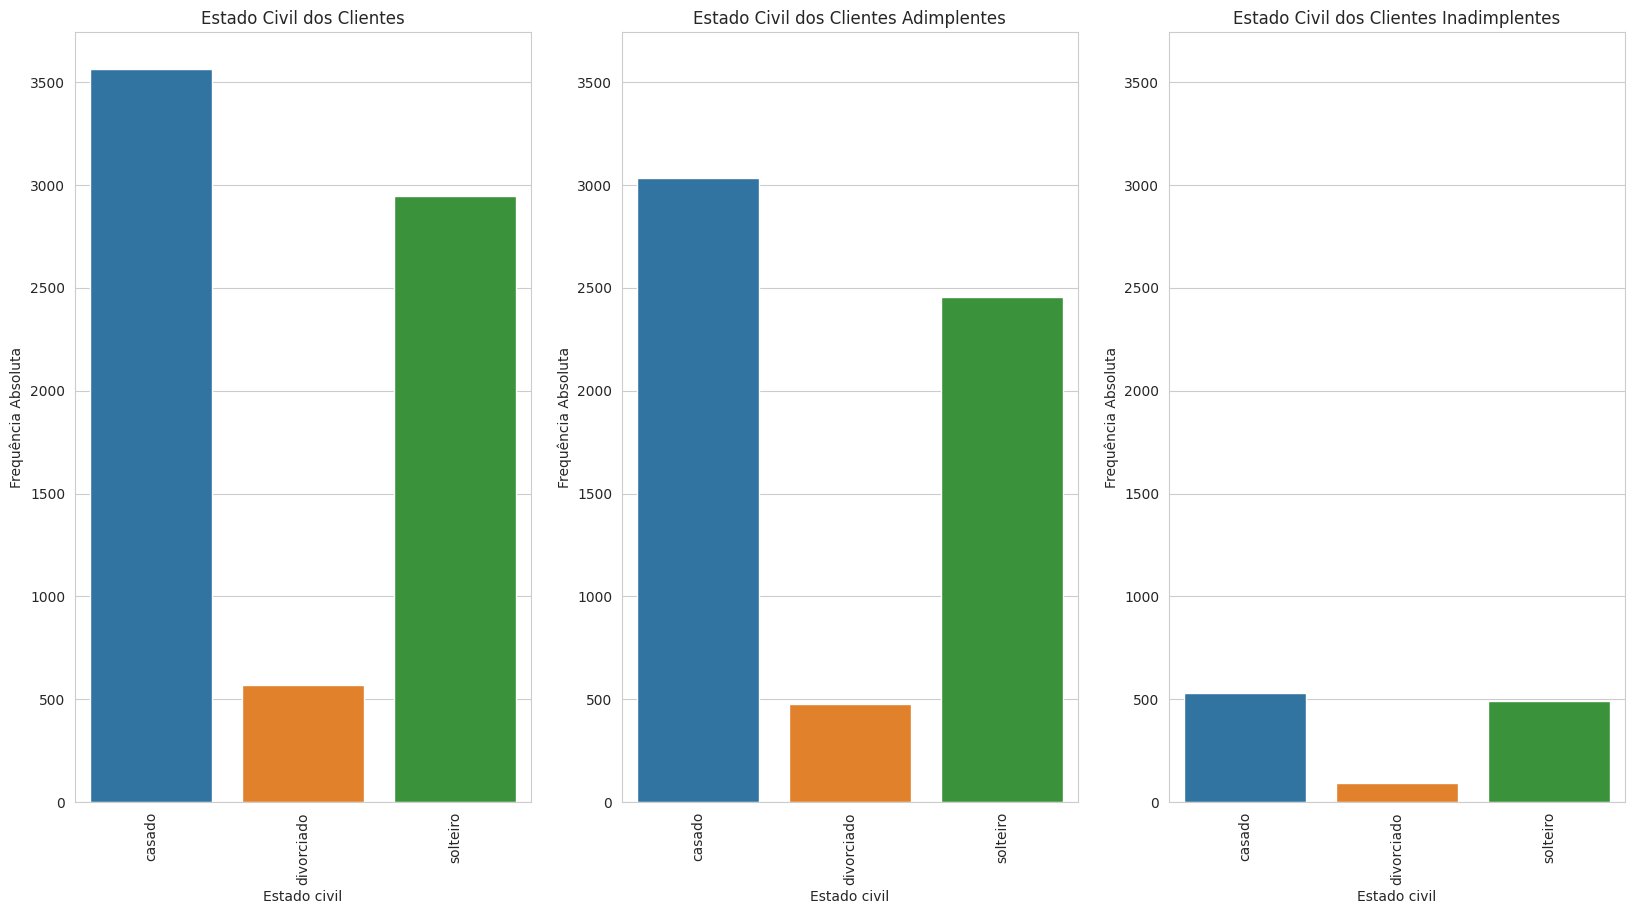

In [69]:
grafico_comparativo_vc('estado_civil')

Nos gráficos comparativos sobre o estado civil dos clientes, observamos que, ao contrário do gráfico de todos os clientes e dos clientes adimplentes, onde a distribuição dos clientes casados era superior, no gráfico dos clientes inadimplentes, esse número praticamente se iguala ao número de clientes solteiros.

- Escolaridade

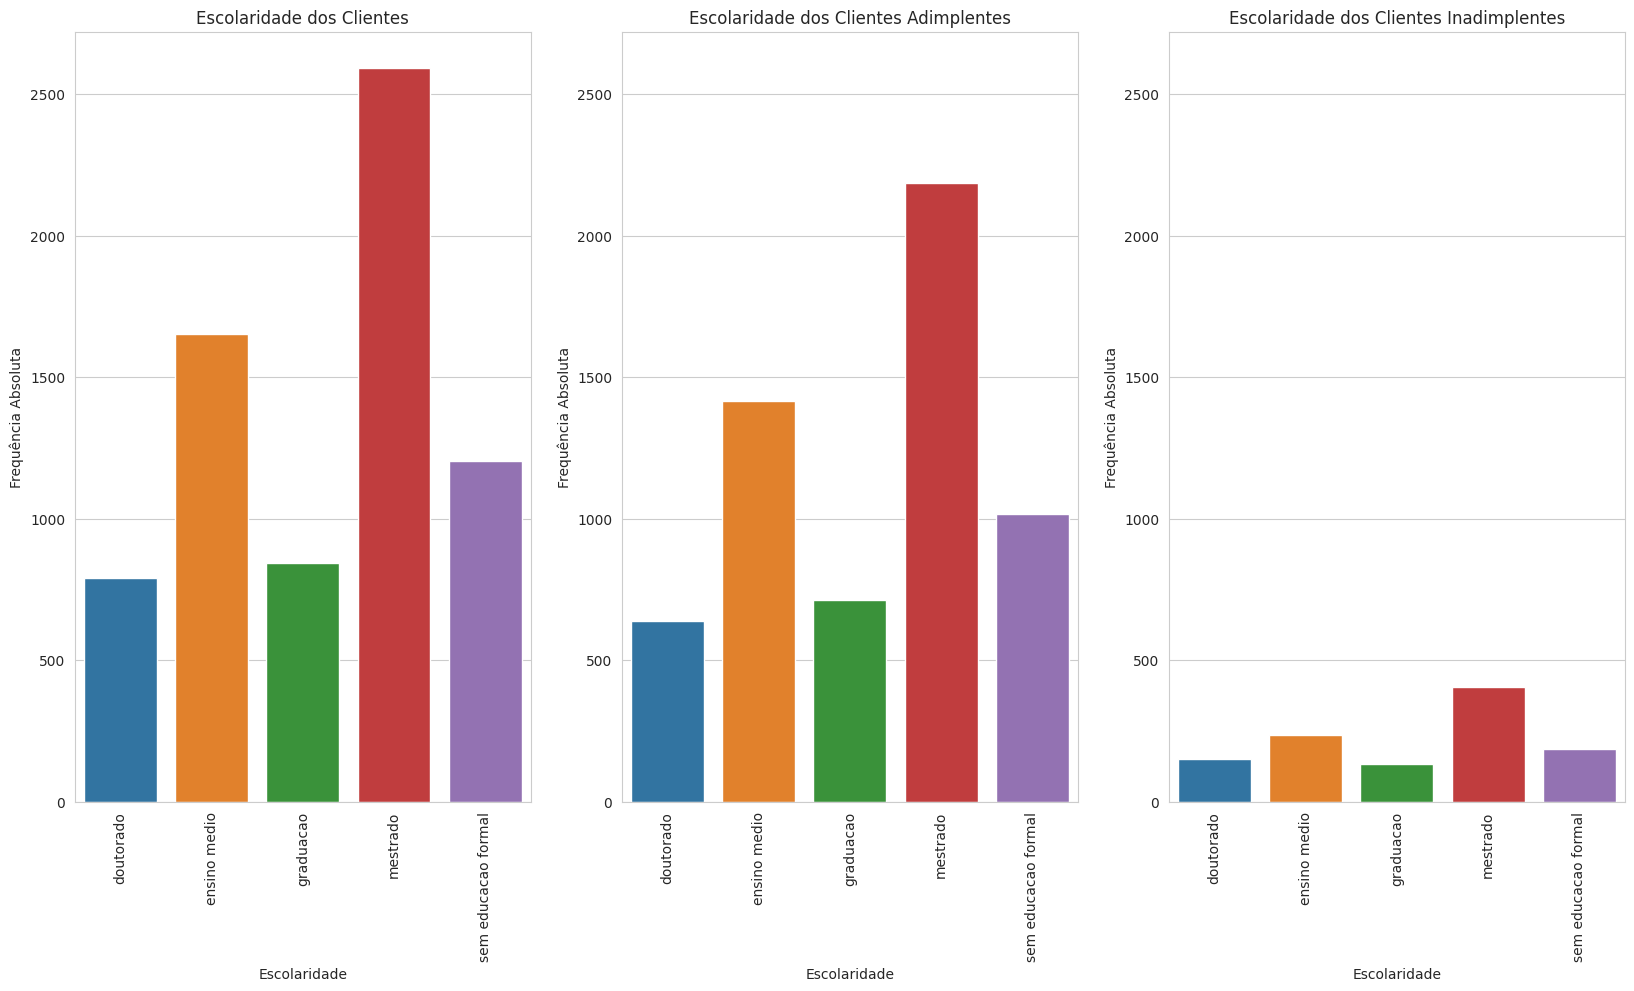

In [70]:
grafico_comparativo_vc('escolaridade')

Nos gráficos comparativos sobre escolaridade dos clientes, nota-se uma pequena diferença: os clientes com nível de 'doutorado' são mais propensos a serem inadimplentes em comparação aos 'graduados'.







- Salário Anual

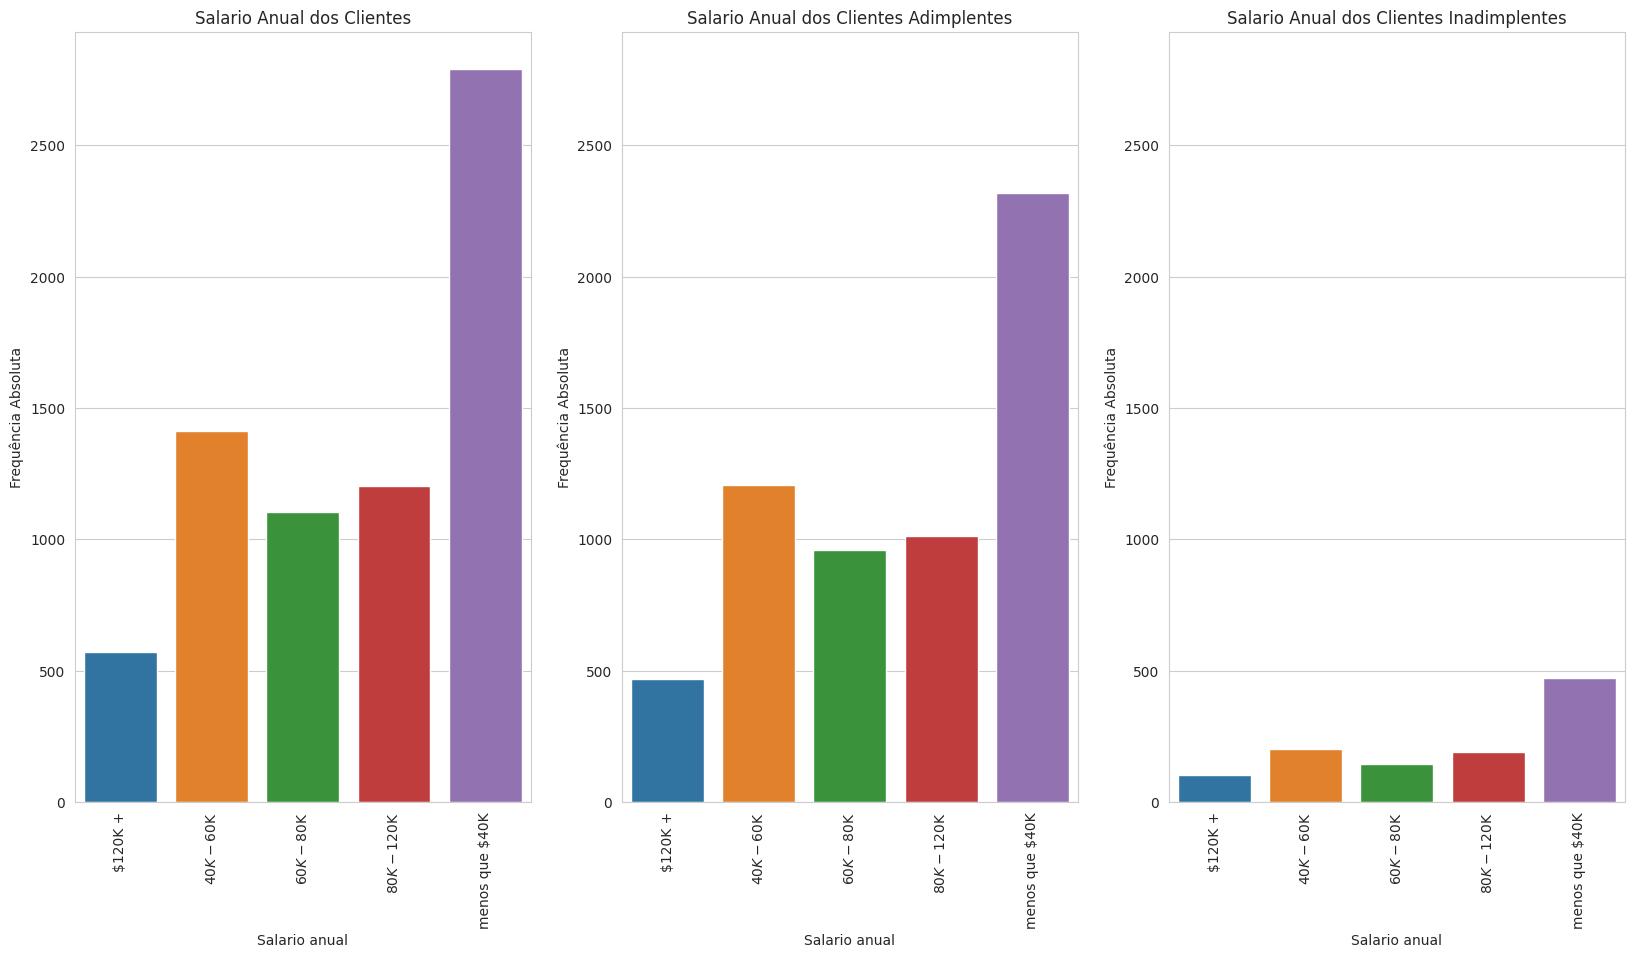

In [71]:
grafico_comparativo_vc('salario_anual')

Nos gráficos comparativos que representa o salário anual dos clientes, não é evidente uma variação na distribuição nos três gráficos.

- Tipo de cartão

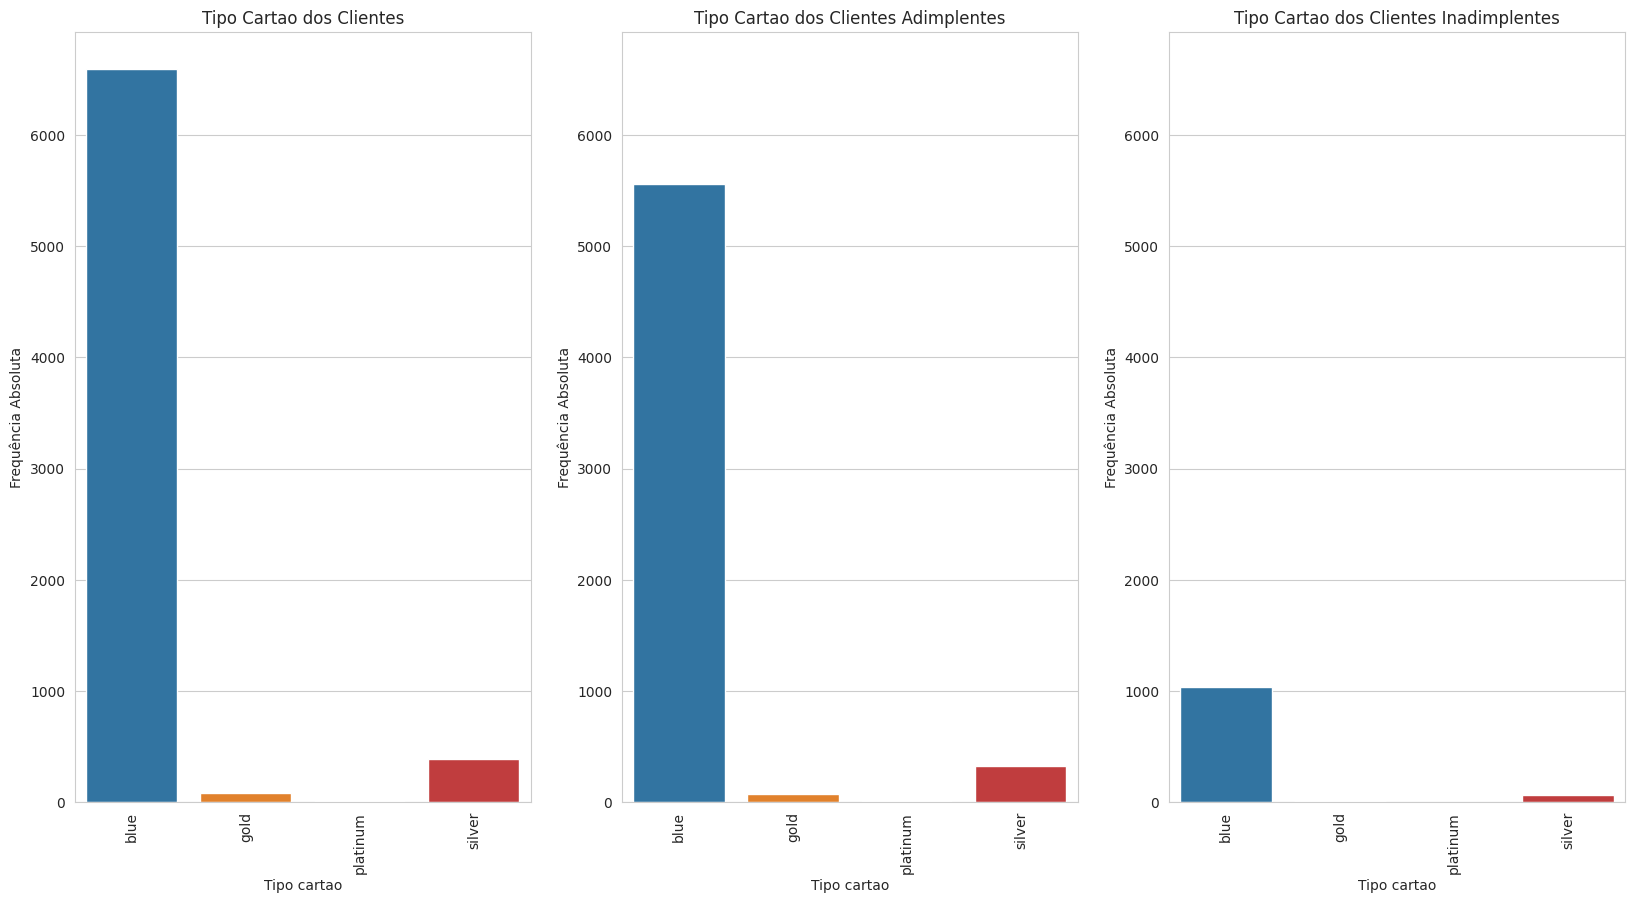

In [72]:
grafico_comparativo_vc('tipo_cartao')

Nos gráficos comparativos que representam o tipo de cartão dos clientes, é perceptível que os clientes inadimplentes praticamente não possuem cartão do tipo 'gold'.







###Visualizações Númericas

Nesta seção, vamos visualizar a relação entre a variável resposta **Inadimplente** com os atributos numéricos.

In [73]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


In [74]:
def grafico_comparativo_vn(coluna:str):
  coluna = coluna
  titulos = [f'Qtd. de {coluna.replace("_", " ").title()}',
             f'Qtd. de {coluna.replace("_", " ").title()} de Adimplentes',
             f'Qtd. de {coluna.replace("_", " ").title()} de Inadimplentes']

  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.replace("_", " ").capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

- Idade

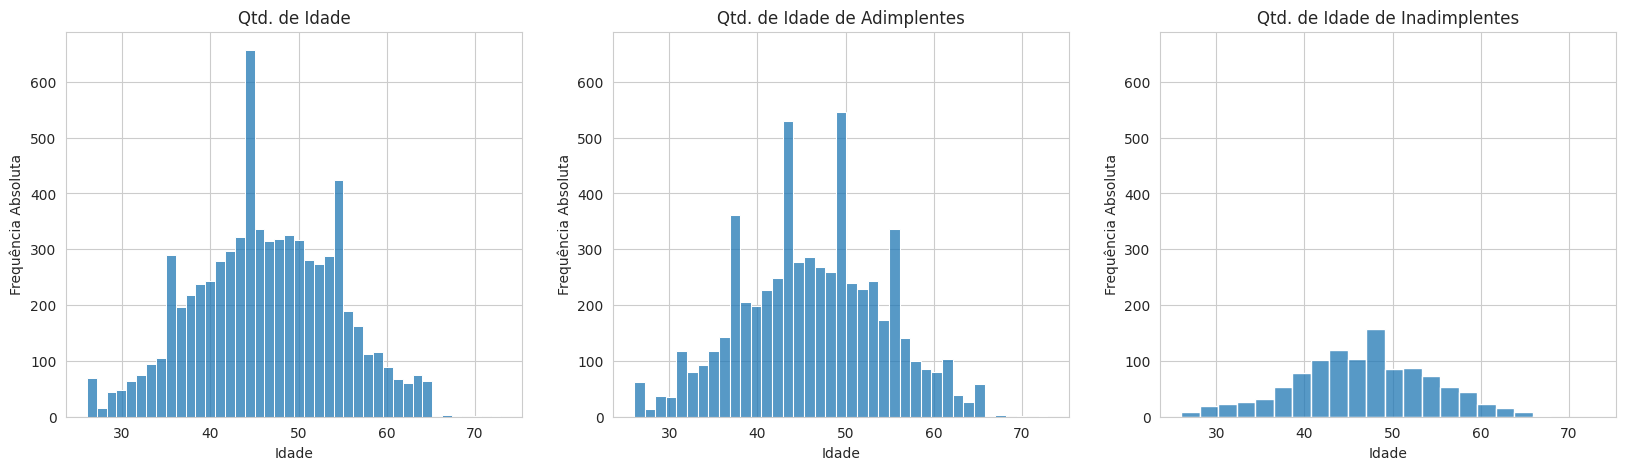

In [75]:
grafico_comparativo_vn('idade')

Nos gráficos comparativos que representa a idade, não é evidente uma variação na distribuição nos três gráficos.

- Dependentes

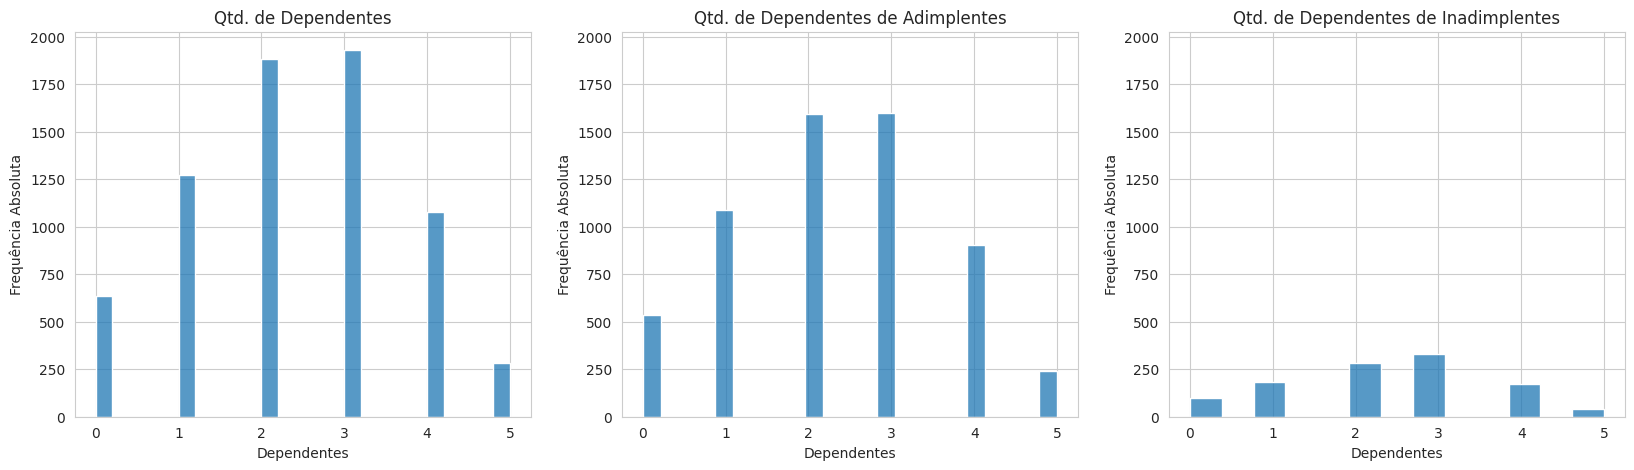

In [76]:
grafico_comparativo_vn('dependentes')

Nos gráficos comparativos que representa a quantidade de dependentes, não é evidente uma variação na distribuição nos três gráficos.

- Meses de Relacionamento

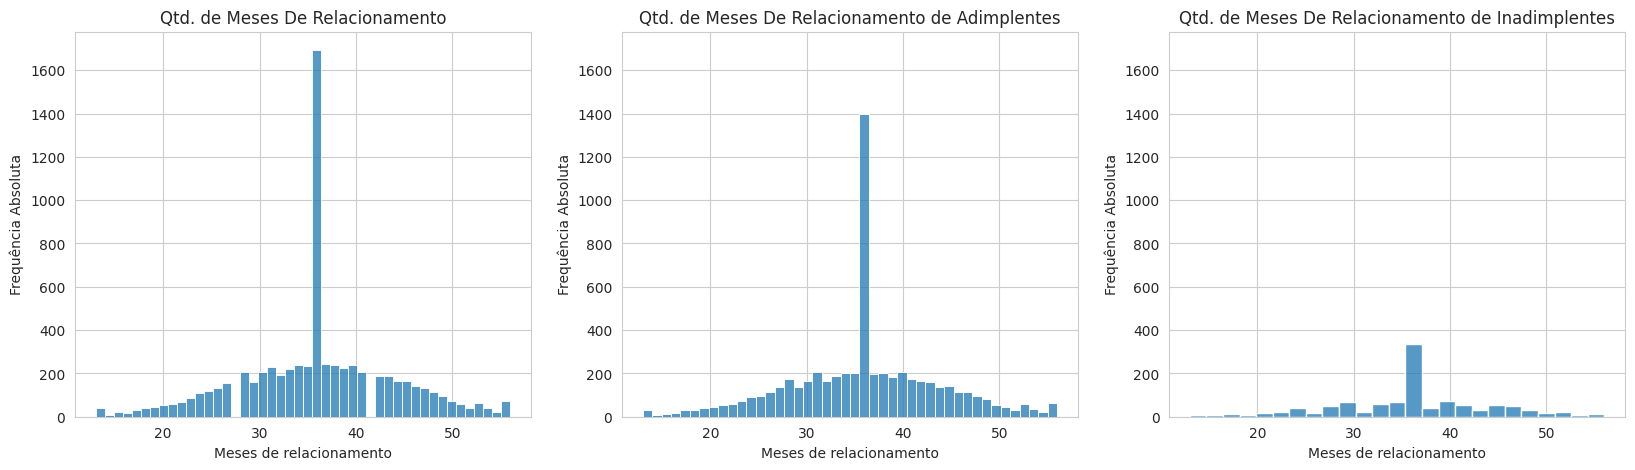

In [77]:
grafico_comparativo_vn('meses_de_relacionamento')

Nos gráficos comparativos que representa os meses de relacionamento dos clientes, não é evidente uma variação na distribuição nos três gráficos.

- Quantidade de produtos

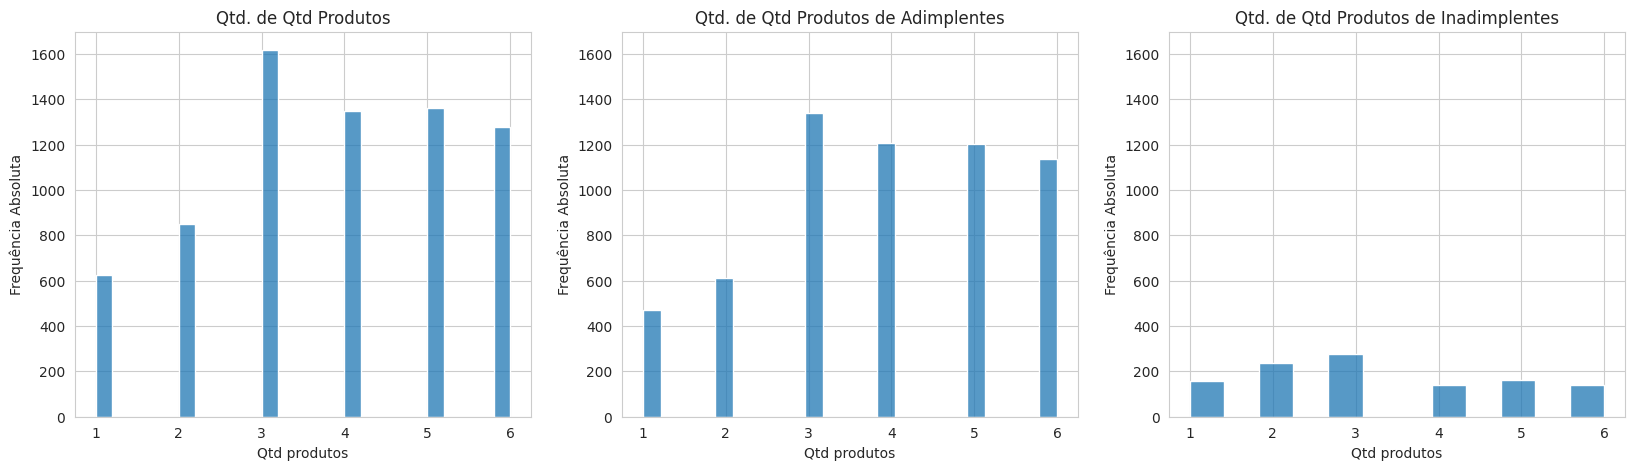

In [78]:
grafico_comparativo_vn('qtd_produtos')

Ao analisarmos os gráficos, percebemos que os clientes inadimplentes geralmente possuem entre 2 e 3 produtos. Por outro lado, ao analisar os dados dos clientes adimplentes e de todos os clientes em geral, é evidente que a tendência é ter de 3 a 6 produtos.


- Interações nos últimos 12 meses

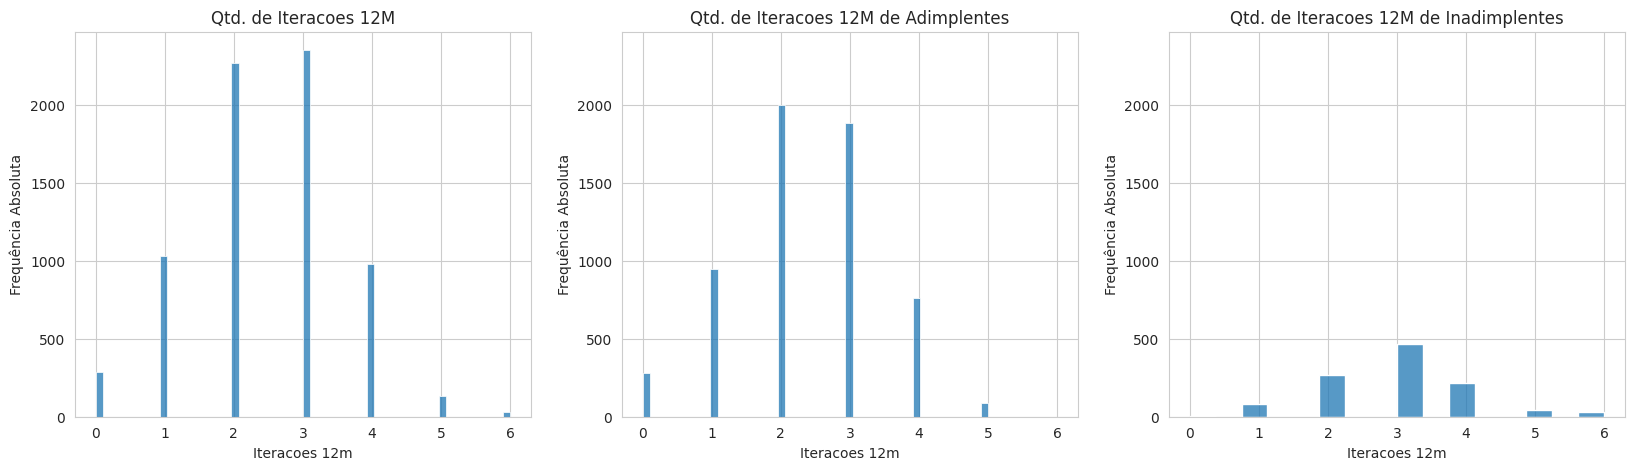

In [79]:
grafico_comparativo_vn('iteracoes_12m')

O número de iterações também pode estar ligado com a inadimplência, sendo que entre os inadimplentes, boa parte deles tiveram 3 iterações nos últimos 12 meses.


- Quantidade de meses inativos no último ano

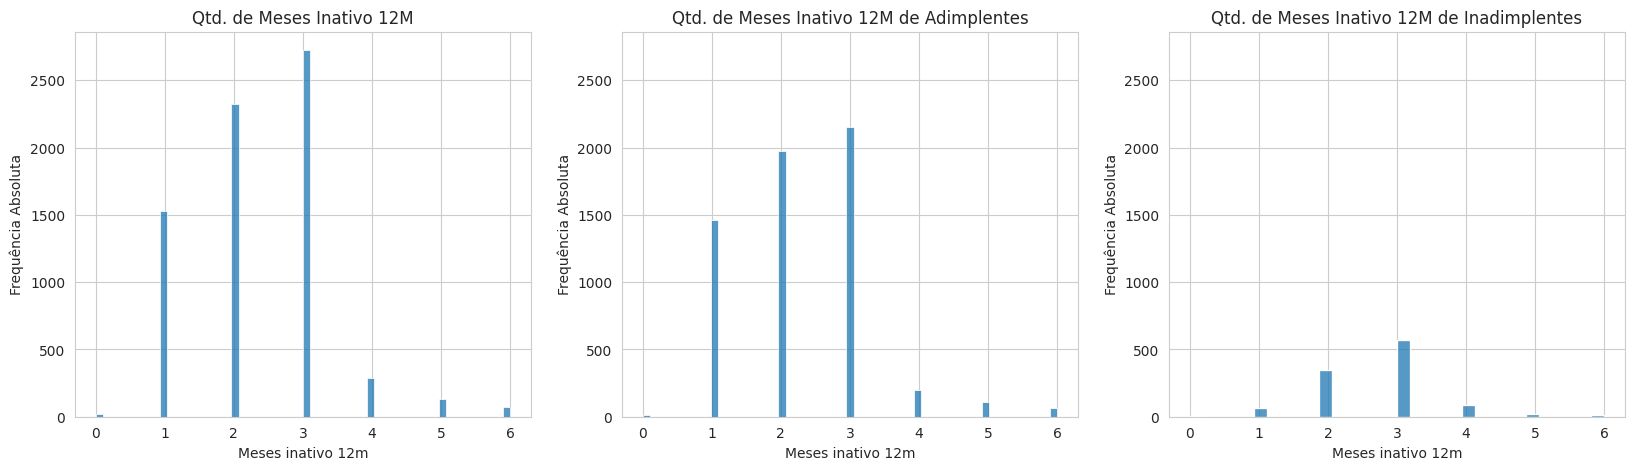

In [80]:
grafico_comparativo_vn('meses_inativo_12m')

Nos gráficos comparativos que representa a quantidade de meses iantivos nos últimos 12 meses, não é evidente uma variação na distribuição nos três gráficos.

- Quantidade de Limite de crédito

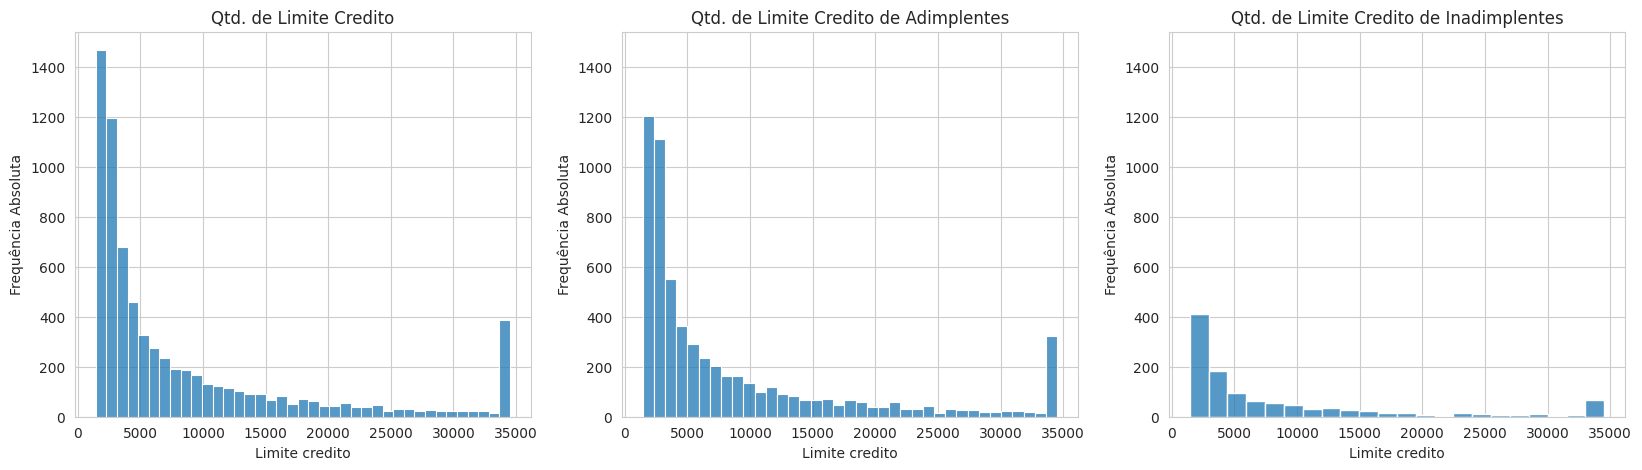

In [85]:
grafico_comparativo_vn('limite_credito')

Nos gráficos comparativos que representa o limite de crédito, não é evidente uma variação na distribuição nos três gráficos.

- Valores das tranções nos últimos 12 meses

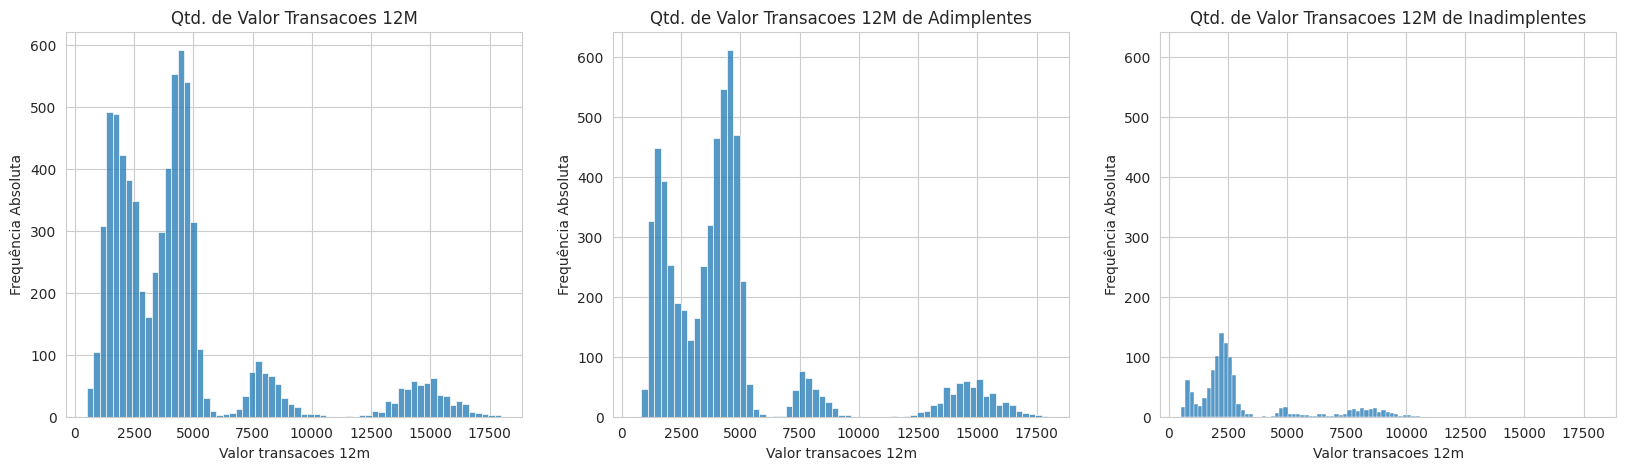

In [82]:
grafico_comparativo_vn('valor_transacoes_12m')

Os clientes inadimplentes estão demonstrando um padrão de gastos, com uma média de despesas em torno de 2.500,00 reais nos últimos 12 meses, sem ultrapassar valores superiores a 10.000,00 no mesmo período.

- Quantidade de transações nos últimos 12 meses

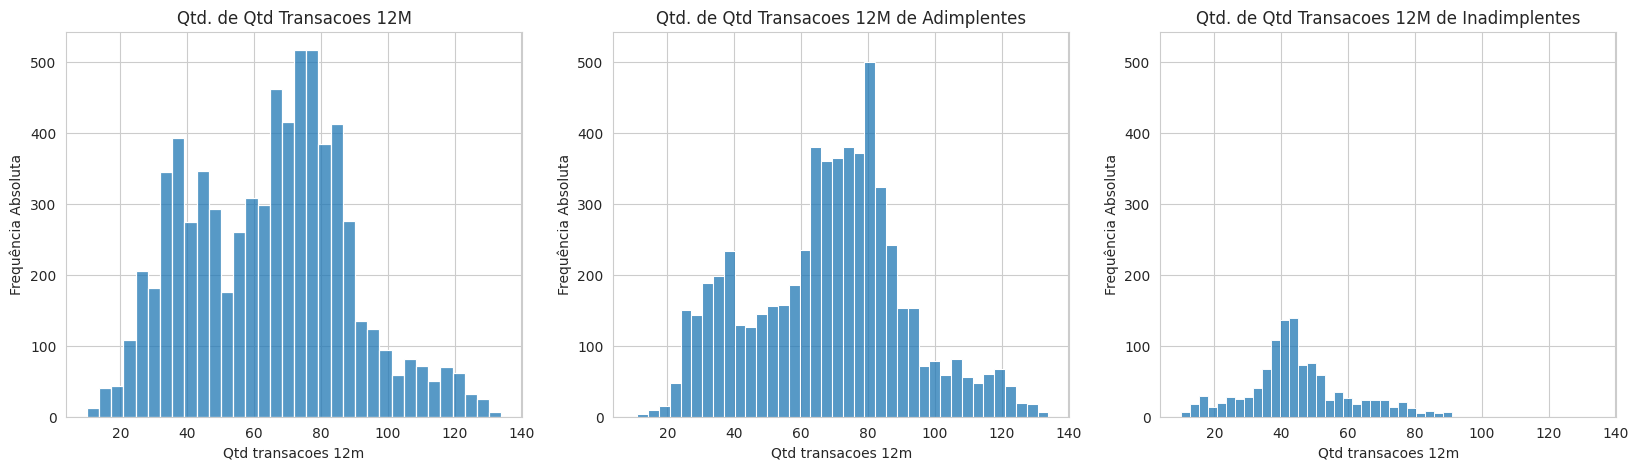

In [83]:
grafico_comparativo_vn('qtd_transacoes_12m')

Clientes que realizam entre 20 a 60 transações nos últimos 12 meses há uma possibilidade de virarem inadimplentes.

- Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

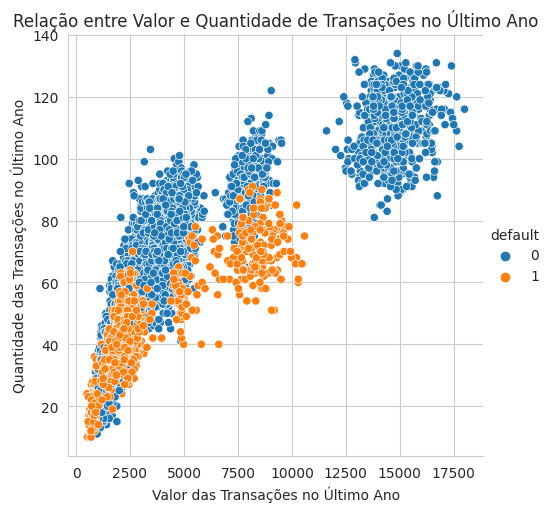

In [84]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

Clientes que realizam mais transações e com valores elevados geralmente não apresentam inadimplência. Em contrapartida, aqueles que realizam transações de valores baixos e em menor quantidade tendem a se tornar inadimplentes.







#***insights gerados***

Conclusões de nossa analise:


*   É perceptível que os clientes inadimplentes praticamente não possuem cartão do tipo 'gold';
*   Clientes inadimplentes geralmente possuem entre 2 e 3 produtos enquando a média dos clintes adimplentes é de 3 a 6 produtos;
*   O número de iterações também pode estar ligado com a inadimplência, sendo que entre os inadimplentes, boa parte deles tiveram 3 iterações nos últimos 12 meses;
*   Os clientes inadimplentes demostram um padrão de gastos, com uma média de despesas em torno de 2.500,00 reais nos últimos 12 meses, sem ultrapassar valores superiores a 10.000,00 no mesmo período;
*   Clientes que realizam entre 20 a 60 transações nos últimos 12 meses há uma possibilidade de virarem inadimplentes;
*   Clientes que realizam mais transações e com valores elevados geralmente não apresentam inadimplência. Em contrapartida, aqueles que realizam transações de valores baixos e em menor quantidade tendem a se tornar inadimplentes;

